<a href="https://colab.research.google.com/github/tuyenhuynh301239851/Vietnam-War/blob/main/BombingModelAndAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import glob
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

DATA PROCESSING

In [7]:
files = glob.glob('/content/sample_data/THOR_dataset/*.csv')
files

['/content/sample_data/THOR_dataset/THOR_Vietnam_Aircraft_Glossary.csv',
 '/content/sample_data/THOR_dataset/THOR_Vietnam_Bombing_Operations.csv',
 '/content/sample_data/THOR_dataset/THOR_Vietnam_Weapons_Glossary.csv']

In [8]:
def read_csv(file):
  df = pd.read_csv(file, encoding = 'latin-1')
  return df

df_bombing = read_csv(files[1])
df_bombing.head()

<ipython-input-8-6d16e0a5d068>:2: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, encoding = 'latin-1')


,THOR_DATA_VIET_ID,COUNTRYFLYINGMISSION,MILSERVICE,MSNDATE,SOURCEID,SOURCERECORD,VALID_AIRCRAFT_ROOT,TAKEOFFLOCATION,TGTLATDD_DDD_WGS84,TGTLONDDD_DDD_WGS84,...,GEOZONE,ID,MFUNC_DESC_CLASS,NUMWEAPONSJETTISONED,NUMWEAPONSRETURNED,RELEASEALTITUDE,RELEASEFLTSPEED,RESULTSBDA,TIMEOFFTARGET,WEAPONSLOADEDWEIGHT
0,351,UNITED STATES OF AMERICA,USAF,1971-06-05,647464,SEADAB,EC-47,TAN SON NHUT,NaN,NaN,...,NaN,27135863.0,NONKINETIC,-1.0,-1.0,NaN,NaN,NaN,1005.0,0.0
1,2,UNITED STATES OF AMERICA,USAF,1972-12-26,642778,SEADAB,EC-47,NAKHON PHANOM,NaN,NaN,...,NaN,27131177.0,NONKINETIC,-1.0,-1.0,NaN,NaN,NaN,530.0,0.0
2,3,UNITED STATES OF AMERICA,USAF,1973-07-28,642779,SEADAB,RF-4,UDORN AB,NaN,NaN,...,NaN,27131178.0,NONKINETIC,-1.0,-1.0,NaN,NaN,NaN,730.0,0.0
3,4,UNITED STATES OF AMERICA,USAF,1970-02-02,642780,SEADAB,A-1,NAKHON PHANOM,16.902500,106.014166,...,XE,27131179.0,KINETIC,-1.0,-1.0,NaN,NaN,SECONDARY FIRE,1415.0,17400.0
4,5,VIETNAM (SOUTH),VNAF,1970-10-08,642781,SEADAB,A-37,DANANG,14.945555,108.257222,...,ZB,27131180.0,KINETIC,-1.0,-1.0,NaN,NaN,RNO WEATHER,1240.0,0.0


In [9]:
df_bombing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44366 entries, 0 to 44365
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   THOR_DATA_VIET_ID     44366 non-null  int64  
 1   COUNTRYFLYINGMISSION  44297 non-null  object 
 2   MILSERVICE            44307 non-null  object 
 3   MSNDATE               44366 non-null  object 
 4   SOURCEID              44366 non-null  int64  
 5   SOURCERECORD          44366 non-null  object 
 6   VALID_AIRCRAFT_ROOT   44366 non-null  object 
 7   TAKEOFFLOCATION       44297 non-null  object 
 8   TGTLATDD_DDD_WGS84    22834 non-null  float64
 9   TGTLONDDD_DDD_WGS84   22834 non-null  float64
 10  TGTTYPE               5572 non-null   object 
 11  NUMWEAPONSDELIVERED   44366 non-null  int64  
 12  TIMEONTARGET          44305 non-null  float64
 13  WEAPONTYPE            10087 non-null  object 
 14  WEAPONTYPECLASS       0 non-null      float64
 15  WEAPONTYPEWEIGHT   

In [10]:
df_bombing.drop_duplicates(inplace=True)

In [11]:
df_bombing.isnull().sum()

,0
THOR_DATA_VIET_ID,0
COUNTRYFLYINGMISSION,69
MILSERVICE,59
MSNDATE,0
SOURCEID,0
SOURCERECORD,0
VALID_AIRCRAFT_ROOT,0
TAKEOFFLOCATION,69
TGTLATDD_DDD_WGS84,21532
TGTLONDDD_DDD_WGS84,21532


In [12]:
distinct_summary = pd.DataFrame({
    "column": df_bombing.columns
    , "distinct_count": [df_bombing[col].nunique(dropna = True) for col in df_bombing.columns]
})
distinct_summary = distinct_summary.sort_values(by ="distinct_count", ascending = True).reset_index(drop =True)
distinct_summary

,column,distinct_count
0,WEAPONTYPECLASS,0
1,OPERATIONSUPPORTED,0
2,TGTCONTROL,0
3,TGTCLOUDCOVER,0
4,TGTWEATHER,0
5,SOURCERECORD,1
6,TGTID,1
7,TGTORIGCOORDSFORMAT,1
8,NUMWEAPONSJETTISONED,1
9,NUMWEAPONSRETURNED,1


In [13]:
df_bombing = df_bombing.rename(
    columns={
        "THOR_DATA_VIET_ID": "mission_id"
        , "MSNDATE": "mission_date"
        , "COUNTRYFLYINGMISSION": "country_flying_mission"
        , "TAKEOFFLOCATION": "take_off_location"
        , "TGTCOUNTRY": "target_country"
        , "RESULTSBDA": "result_bombing"
        , 'RELEASEALTITUDE': "release_altitude"
        , "RELEASEFLTSPEED": "release_speed"
        , "WEAPONSLOADEDWEIGHT": "weapons_loaded_weight"
        , "TGTCLOUDCOVER": "target_cloud_cover"
    }
)

In [14]:
mission_year = df_bombing['mission_date'].str[:4].astype(int)
df_bombing.insert(1, "mission_year", mission_year)

In [15]:
df_bombing.columns

Index(['mission_id', 'mission_year', 'country_flying_mission', 'MILSERVICE',
       'mission_date', 'SOURCEID', 'SOURCERECORD', 'VALID_AIRCRAFT_ROOT',
       'take_off_location', 'TGTLATDD_DDD_WGS84', 'TGTLONDDD_DDD_WGS84',
       'TGTTYPE', 'NUMWEAPONSDELIVERED', 'TIMEONTARGET', 'WEAPONTYPE',
       'WEAPONTYPECLASS', 'WEAPONTYPEWEIGHT', 'AIRCRAFT_ORIGINAL',
       'AIRCRAFT_ROOT', 'AIRFORCEGROUP', 'AIRFORCESQDN', 'CALLSIGN',
       'FLTHOURS', 'MFUNC', 'MFUNC_DESC', 'MISSIONID', 'NUMOFACFT',
       'OPERATIONSUPPORTED', 'PERIODOFDAY', 'UNIT', 'target_cloud_cover',
       'TGTCONTROL', 'target_country', 'TGTID', 'TGTORIGCOORDS',
       'TGTORIGCOORDSFORMAT', 'TGTWEATHER', 'ADDITIONALINFO', 'GEOZONE', 'ID',
       'MFUNC_DESC_CLASS', 'NUMWEAPONSJETTISONED', 'NUMWEAPONSRETURNED',
       'release_altitude', 'release_speed', 'result_bombing', 'TIMEOFFTARGET',
       'weapons_loaded_weight'],
      dtype='object')

ANALYSIS

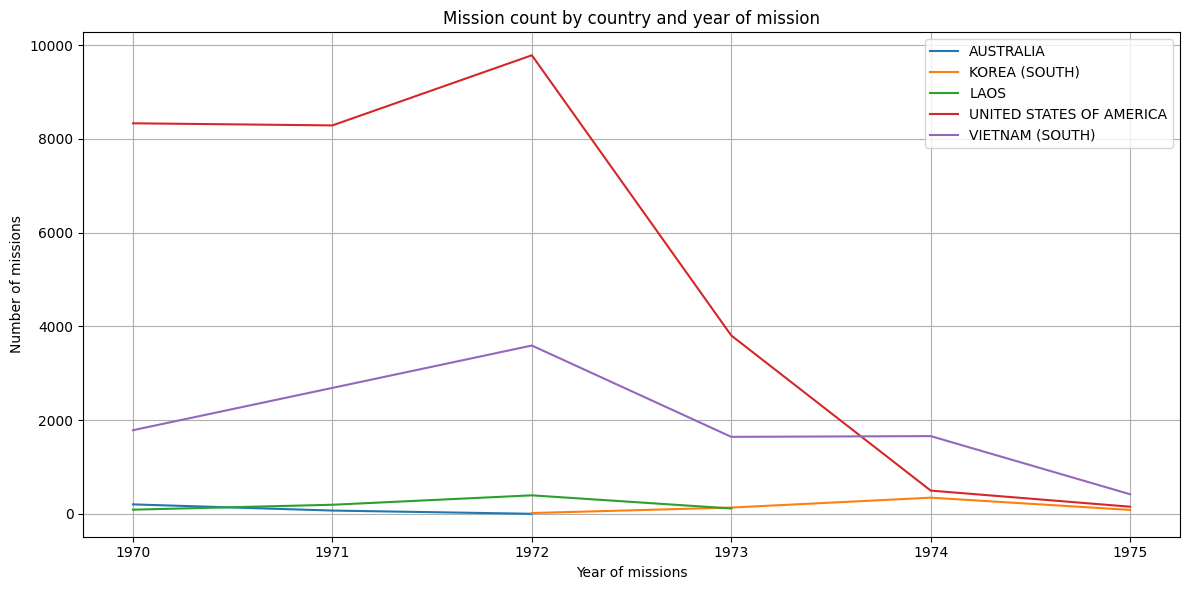

''

In [16]:
missions_by_year = df_bombing.groupby(["mission_year", "country_flying_mission"]).size().reset_index(name = "MissionCount")
missions_by_year = missions_by_year.sort_values(by= "mission_year")

fig = plt.figure(figsize =(12, 6))

for country, missions in missions_by_year.groupby("country_flying_mission"):
  missions = missions.sort_values("mission_year")
  plt.plot(missions["mission_year"], missions["MissionCount"], label = country)

plt.legend(loc="best")
plt.xlabel("Year of missions")
plt.ylabel("Number of missions")
plt.title("Mission count by country and year of mission")
plt.grid(True)
plt.tight_layout()
plt.show()
;

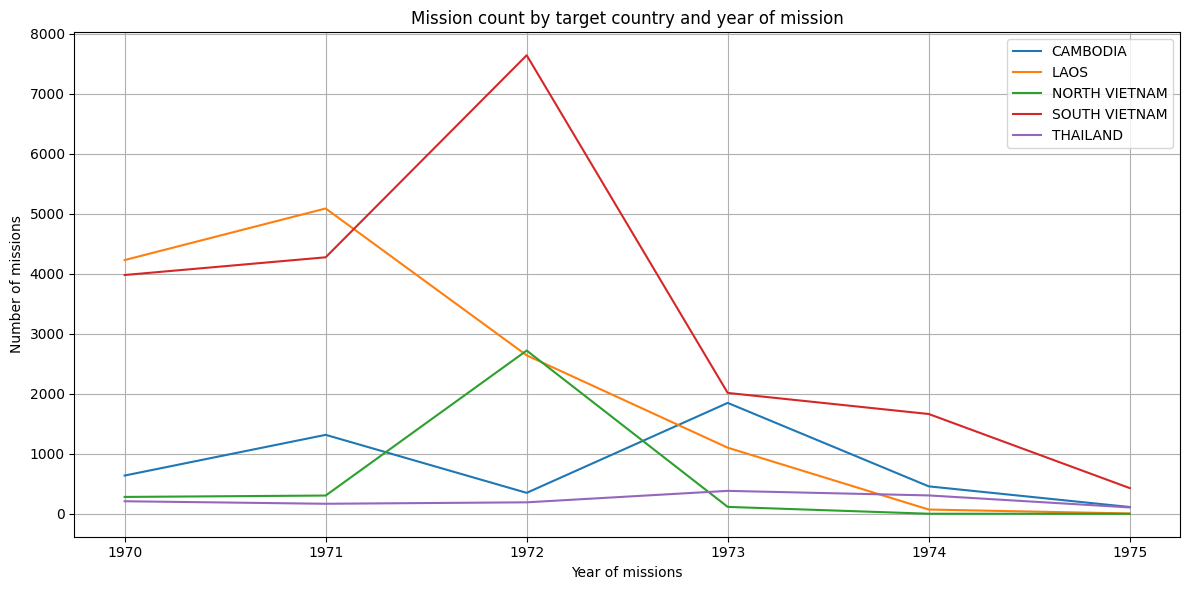

In [17]:
missions_by_tgtcountry = df_bombing.groupby(["mission_year", "target_country"]).size().reset_index(name = "MissionCount" )
missions_by_tgtcountry = missions_by_tgtcountry.sort_values("mission_year")

fig = plt.figure(figsize =(12, 6))

for country, missions in missions_by_tgtcountry.groupby("target_country"):
  missions = missions.sort_values("mission_year")
  plt.plot(missions["mission_year"], missions["MissionCount"], label= country)

plt.legend(loc="best")
plt.xlabel("Year of missions")
plt.ylabel("Number of missions")
plt.title("Mission count by target country and year of mission")
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-18-0c82a43b4b4f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = df_takeoff_location, x ="take_off_location", y="MissionCount", palette = "viridis")


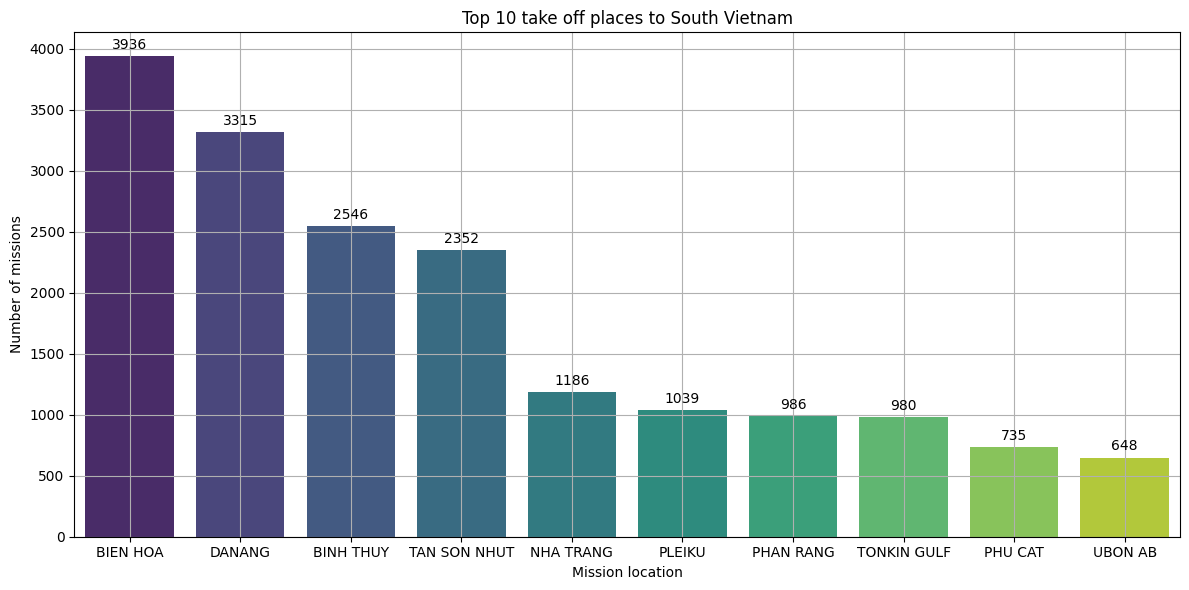

In [18]:
df_south_vn = df_bombing[df_bombing["target_country"]== "SOUTH VIETNAM"]

df_takeoff_location = df_south_vn.groupby("take_off_location").size().reset_index(name = "MissionCount")
df_takeoff_location = df_takeoff_location.sort_values("MissionCount", ascending = False)
df_takeoff_location = df_takeoff_location.head(10)

fig = plt.figure(figsize =(12, 6))
ax = sns.barplot(data = df_takeoff_location, x ="take_off_location", y="MissionCount", palette = "viridis")

for container in ax.containers:
  ax.bar_label(container, fmt="%.0f", label_type = "edge", padding=3)

plt.title("Top 10 take off places to South Vietnam")
plt.xlabel("Mission location")
plt.ylabel("Number of missions")
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-19-7c4208d61f47>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = top10_southvn_result, x = "result_bombing", y = "MissionCount", palette = "magma")


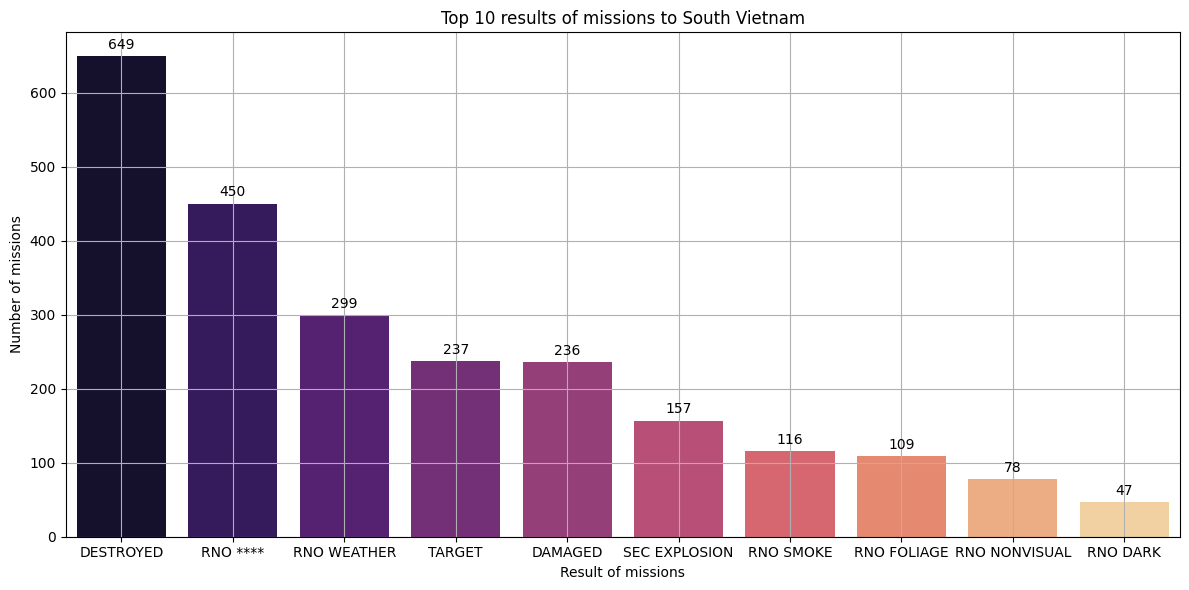

In [19]:
df_southvn_result = df_south_vn.groupby("result_bombing").size().reset_index(name="MissionCount")
df_southvn_result = df_southvn_result.sort_values(by="MissionCount", ascending = False)
top10_southvn_result = df_southvn_result.head(10)
top10_southvn_result

fig = plt.figure(figsize =(12, 6))
ax = sns.barplot(data = top10_southvn_result, x = "result_bombing", y = "MissionCount", palette = "magma")

for container in ax.containers:
  ax.bar_label(container, fmt="%.0f", label_type = "edge", padding =3)

plt.title("Top 10 results of missions to South Vietnam")
plt.xlabel("Result of missions")
plt.ylabel("Number of missions")
plt.grid(True)
plt.tight_layout()
plt.show();

<ipython-input-21-f8b3279eb1aa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = df_avg_time, x = "result_bombing", y = "AverageTime", palette = "coolwarm")


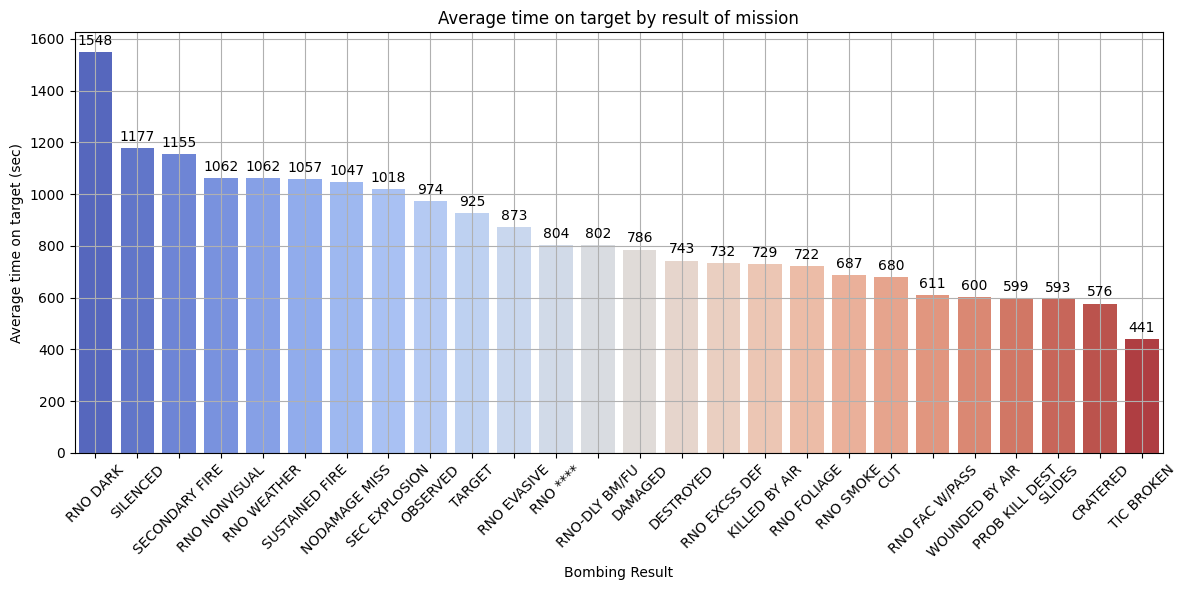

In [21]:
df_result_time = df_bombing[['result_bombing', 'TIMEONTARGET']].dropna()

df_avg_time = df_result_time.groupby("result_bombing")['TIMEONTARGET'].mean().reset_index(name ="AverageTime")
df_avg_time = df_avg_time.sort_values("AverageTime", ascending = False)

fig = plt.figure(figsize =(12, 6))
ax = sns.barplot(data = df_avg_time, x = "result_bombing", y = "AverageTime", palette = "coolwarm")

for container in ax.containers:
  ax.bar_label(container, fmt= "%.0f", padding = 3)

plt.title("Average time on target by result of mission")
plt.xlabel("Bombing Result")
plt.ylabel("Average time on target (sec)")
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()
plt.show()

PREDICTED MODEL

Numerical Variables:
- mission_year: Year the mission was carried out
- TIMEONTARGET, TIMEOFFTARGET: Time when the bombing was aimed/released
- RELEASEALTITUDE: Altitude at which the bombs were released
- RELEASEFLTSPEED: Flight speed at the time of bomb release
- WEAPONSLOADEDWEIGHT: Total weight of weapons loaded
- NUMWEAPONSJETTISONED, NUMWEAPONSRETURNED: Number of weapons jettisoned (discarded) and number of weapons returned

Categorical Variables:
- country_flying_mission: Country flying the mission
- MFUNC_DESC_CLASS: Type or classification of the mission
- VALID_AIRCRAFT_ROOT: Type of aircraft used in the mission

In [40]:
df_model = df_bombing.dropna(subset = ["result_bombing"])
features =[
    "mission_year", "TIMEONTARGET", "TIMEOFFTARGET", "release_altitude",
    "release_speed", "weapons_loaded_weight", "NUMWEAPONSJETTISONED", "NUMWEAPONSRETURNED"
    , "country_flying_mission"
    , "MFUNC_DESC_CLASS", "VALID_AIRCRAFT_ROOT"
]

df_model = df_model[ features + ['result_bombing']].dropna()
df_model.head()

,mission_year,TIMEONTARGET,TIMEOFFTARGET,release_altitude,release_speed,weapons_loaded_weight,NUMWEAPONSJETTISONED,NUMWEAPONSRETURNED,country_flying_mission,MFUNC_DESC_CLASS,VALID_AIRCRAFT_ROOT,result_bombing
5703,1971,610.0,610.0,15.0,55.0,0.0,-1.0,-1.0,UNITED STATES OF AMERICA,NONKINETIC,F-4,RNO-DLY BM/FU
13007,1972,1000.0,1000.0,0.0,30.0,5280.0,-1.0,-1.0,UNITED STATES OF AMERICA,KINETIC,A-37,DESTROYED
15450,1972,447.0,447.0,25.0,30.0,0.0,-1.0,-1.0,UNITED STATES OF AMERICA,KINETIC,A-37,DAMAGED
44060,1971,1010.0,1010.0,0.0,45.0,0.0,-1.0,-1.0,UNITED STATES OF AMERICA,KINETIC,F-4,SEC EXPLOSION


In [41]:
df_model.dtypes

,0
mission_year,int64
TIMEONTARGET,float64
TIMEOFFTARGET,float64
release_altitude,float64
release_speed,float64
weapons_loaded_weight,float64
NUMWEAPONSJETTISONED,float64
NUMWEAPONSRETURNED,float64
country_flying_mission,object
MFUNC_DESC_CLASS,object


In [42]:
# Encode categorical variables
categorical_cols = ["country_flying_mission", "MFUNC_DESC_CLASS", "VALID_AIRCRAFT_ROOT"]
df_model = pd.get_dummies(df_model, columns = categorical_cols)

# Encode target variable
le = LabelEncoder()
df_model["result_bombing"] = le.fit_transform(df_model["result_bombing"])

# Split features and target
X = df_model.drop("result_bombing", axis=1)
y = df_model["result_bombing"]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

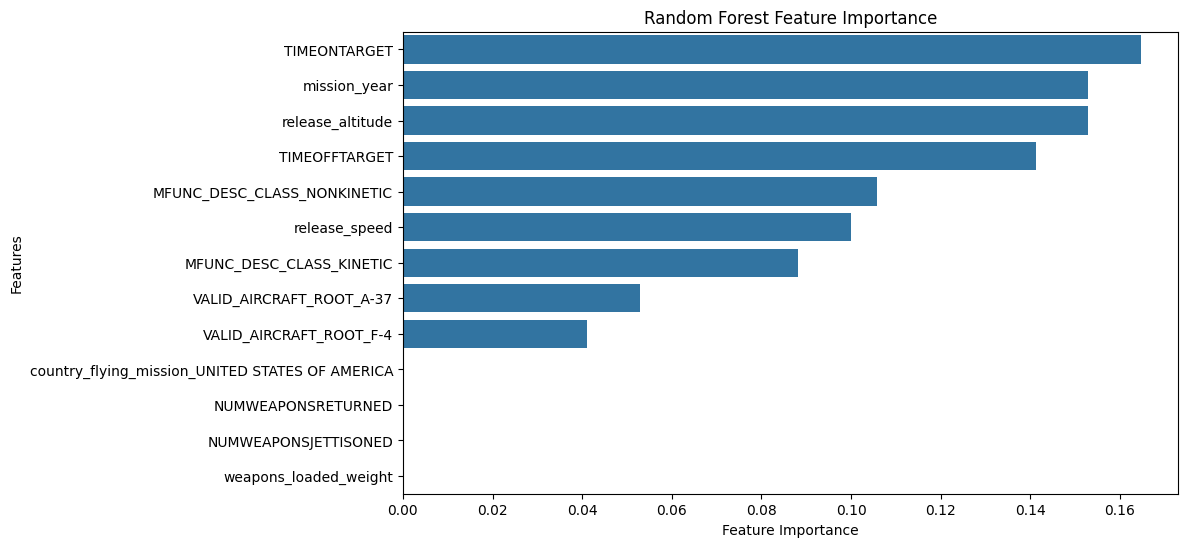

In [51]:
# Get feature importance
importances = model.feature_importances_
feat_names = X.columns

# Sort features by importance
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()

In [52]:
# Function to input data based on model to predict the output result
def predict_new_mission(model, scaler, le, X_columns, categorical_cols, mission_input):
  df_new = pd.DataFrame([mission_input])
  df_new_encoded = pd.get_dummies(df_new, columns=categorical_cols)
  df_new_encoded = df_new_encoded.reindex(columns= X_columns, fill_value=0)
  X_new_scaled = scaler.transform(df_new_encoded)
  y_pred = model.predict(X_new_scaled)
  predicted_label = le.inverse_transform(y_pred)[0]
  return predicted_label

In [53]:
# Test
new_mission = {
    'TIMEOFFTARGET': 900,
    'TIMEONTARGET': 1030,
    'RELEASEALTITUDE': 700,
    'WEAPONSLOADEDWEIGHT': 2000,
    'mission_year': 1972,
    'country_flying_mission': 'UNITED STATES OF AMERICA',
    'MFUNC_DESC_CLASS': 'CLASS_KINETIC',
    'VALID_AIRCRAFT_ROOT': 'F-4',
    'RELEASEFLTSPEED': 700,
    'NUMWEAPONSJETTISONED': 0,
    'NUMWEAPONSRETURNED': 0
}

result = predict_new_mission(model, scaler, le, X.columns, categorical_cols, new_mission)
print("🔍 Predicted Result:", result)

Predicted Result: SEC EXPLOSION
